## **Predicting the Chance of Graduate Studies Admission Using Multiple Linear Regression**

<br>Midterm Project
<br>AML 2203 - Advanced Python AI and ML Tools
<br><br>Group 6:
<br>&emsp;Bhumika Rajendra Babu - C0867081
<br>&emsp;Jovi Fez Bartolata - C0869701
<br>&emsp;Maricris Resma - C0872252
<br>&emsp;Pradeep Kumar Bhatt - C0875486
<br>&emsp;Sunny Prashant Dsouza - C0865183

In [2]:
# Import modules
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.backends.backend_pdf import PdfPages
from math import sqrt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Plot Style
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
sns.set_theme(style='darkgrid', palette='pastel', )
subplot_fontsize = 15
mainplot_fontsize = 20
scatterpoint_fontsize = 20

![separator1](https://i.imgur.com/ZUWYTii.png)
# Get Data and Perform Initial Analysis

In [3]:
# Import data
model_data = pd.read_csv('Admission_Predict.csv',header=0)

# After removing outliers in Chance of Admit, run this to update the data. 
# model_data = model_data_wo_outlier

print(model_data.shape)

model_data.describe()

(400, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
# Reformat column names. Change space to underscore. 
model_data.columns = model_data.columns.str.replace(' ', '_')

# Check info to have an idea if future data cleaning is needed
# To get a view if you have numerical and categorical data
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No.         400 non-null    int64  
 1   GRE_Score          400 non-null    int64  
 2   TOEFL_Score        400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR_               400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit_   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
# Count the null values for each column
model_data.isnull().sum()

Serial_No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR_                 0
CGPA                 0
Research             0
Chance_of_Admit_     0
dtype: int64

In [6]:
# Understand the type of data for each column
model_data.isna().sum()

Serial_No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR_                 0
CGPA                 0
Research             0
Chance_of_Admit_     0
dtype: int64

In [7]:
# Check frequency counts for each column to get an idea of the range of data for each
for eachSeries in model_data:
    print(f'--- Number of Uniqe values for {eachSeries} ---')
    num_unique = model_data[eachSeries].unique()
    print(len(num_unique))

--- Number of Uniqe values for Serial_No. ---
400
--- Number of Uniqe values for GRE_Score ---
49
--- Number of Uniqe values for TOEFL_Score ---
29
--- Number of Uniqe values for University_Rating ---
5
--- Number of Uniqe values for SOP ---
9
--- Number of Uniqe values for LOR_ ---
9
--- Number of Uniqe values for CGPA ---
168
--- Number of Uniqe values for Research ---
2
--- Number of Uniqe values for Chance_of_Admit_ ---
60


### Correlation Heat Map

<!-- # https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22#:~:text=The%20Seaborn%20Pairplot%20allows%20us,to%20become%20familiar%20with%20it.
sns.pairplot(model_data, diag_kind='kde',diag_kws={'color':'red'}, kind='reg',plot_kws={'line_kws':{'color':'black'},'color':'green'},hue='Research',)
plt.show() -->



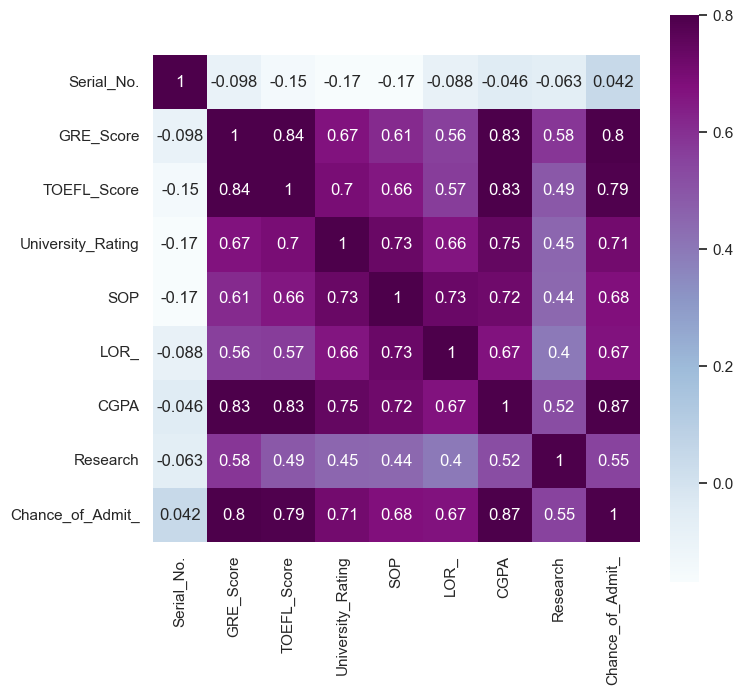

In [8]:
# Compute pairwise correlation of data and visualize
model_data_matrix = model_data.corr()
plt.figure(figsize = (7, 7))
sns.heatmap(model_data_matrix, vmax=.8, square=True, cmap="BuPu",annot=True);
plt.show()


From above matrix we see CGPA, GRE and TOEFL have Top 3 positive correlation with Chance of Admit

In [13]:
# Create copies of the data for the EDA runs
y = model_data['Chance_of_Admit_']
model_data_2 = model_data.drop(columns=['Serial_No.'])

<!-- Univariate Analysis -->
### Histogram to check distribution



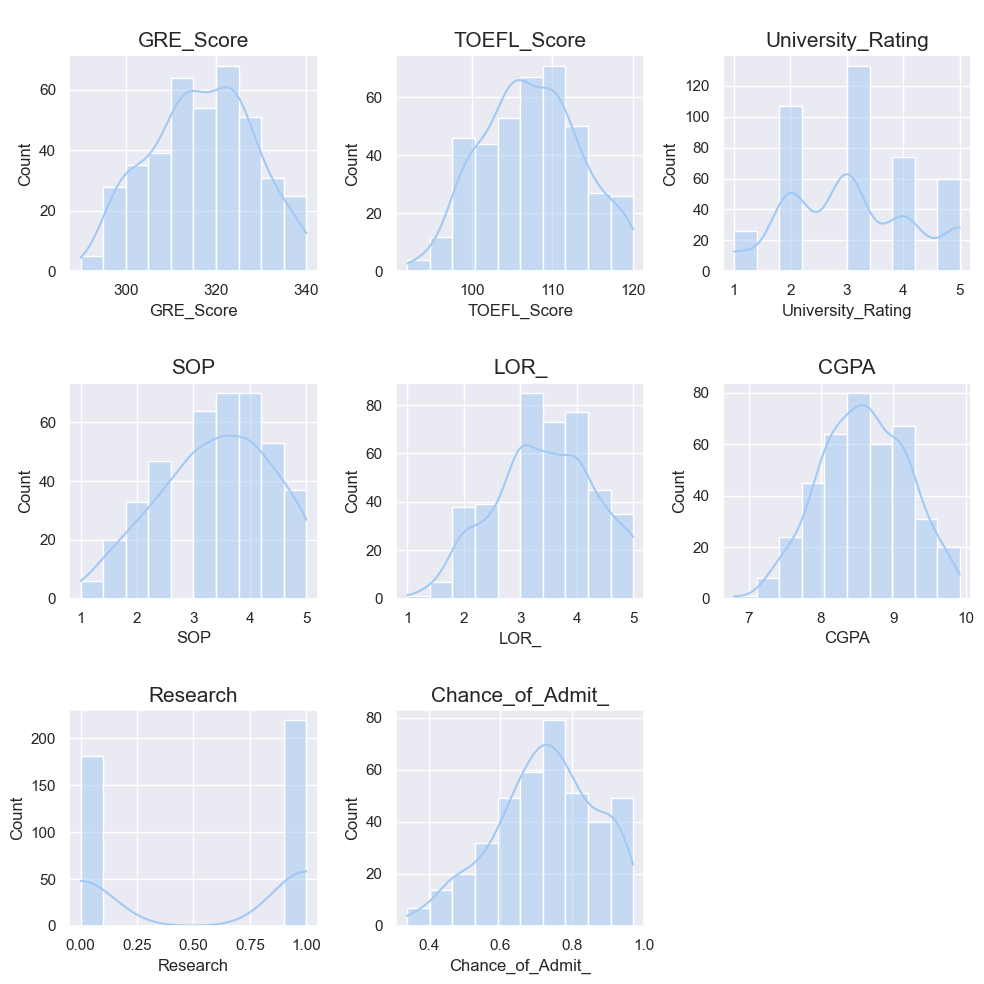

In [16]:
# Plot the histogram of each variable
plt.figure(figsize = (10, 10))
plotnumber = 1

for eachCol in model_data_2:
    x = model_data_2[eachCol]
    ax = plt.subplot(3, 3, plotnumber)
    sns.histplot(x = x, data = y, ax = ax, bins = 10, kde=True)
    plt.title(f"\n{model_data_2[eachCol].name}", fontsize = subplot_fontsize)
    plotnumber += 1
plt.tight_layout()
plt.show()

<!-- Univariate Analysis -->
### Boxplot to view data outliers


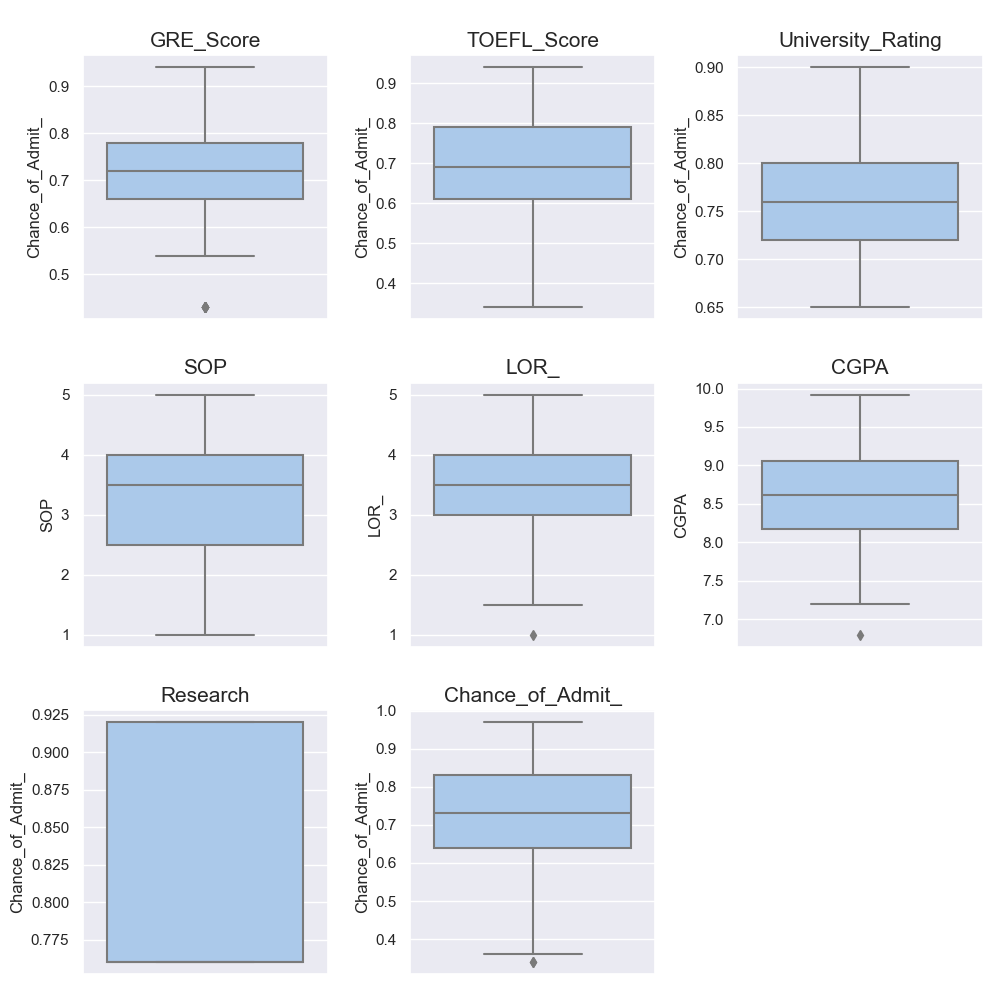

In [18]:
# Show the boxplot of each variable
plt.figure(figsize = (10, 10))
plotnumber = 1

for eachCol in model_data_2:
    x = model_data_2[eachCol]
    ax = plt.subplot(3, 3, plotnumber)
    sns.boxplot(y = x, data = y, ax = ax)
    plt.title(f"\n{model_data_2[eachCol].name}", fontsize = subplot_fontsize)
    plotnumber += 1
plt.tight_layout()
plt.show()


### Remove outliers of Dependent Variable (Chance of Admit)

In [19]:
# Compute for cut-off scores for outlier values of Chance of Admit
quartile_75, quartile_q25 = np.percentile(model_data.loc[:,'Chance_of_Admit_'],[75,25])
interquartile_range = quartile_75 - quartile_q25
 
max = quartile_75 + ( 1.5 * interquartile_range )
min = quartile_q25 - ( 1.5 * interquartile_range )

print('min', min)
print('max', max)

# Tag outliers
outlier_tag = []

for row in model_data['Chance_of_Admit_']:
    if (row < min) or (row > max):
        outlier_tag.append(1)        
    else:
        outlier_tag.append(0)

# Add a column for outlier tag        
model_data['outlier_tag'] = outlier_tag

outlier_obs = model_data[(model_data['outlier_tag']==1)]
print('\n\nOutlier Obs:\n',outlier_obs)


# Remove outliers from final model data
model_data_wo_outlier = model_data[(model_data['outlier_tag']==0)]
print('\n\n')
model_data_wo_outlier.info()

min 0.3550000000000001
max 1.1149999999999998


Outlier Obs:
      Serial_No.  GRE_Score  TOEFL_Score  University_Rating  SOP  LOR_  CGPA  \
92           93        298           98                  2  4.0   3.0  8.03   
376         377        297           96                  2  2.5   2.0  7.43   

     Research  Chance_of_Admit_  outlier_tag  
92          0              0.34            1  
376         0              0.34            1  



<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No.         398 non-null    int64  
 1   GRE_Score          398 non-null    int64  
 2   TOEFL_Score        398 non-null    int64  
 3   University_Rating  398 non-null    int64  
 4   SOP                398 non-null    float64
 5   LOR_               398 non-null    float64
 6   CGPA               398 non-null    float64
 7   Research      

There are two outliers: obs 92 and 326. To create a model without these 2 observartions, use _model_data_wo_outlier_ as _model_data_.

Result: Removing the 2 outliers did not improve the fit of the model, therefore, the original dataset was retained and used in this exercise.

<!-- Multivariate Analysis -->
### Scatterplot to check relationship and pattern with specific discrete data


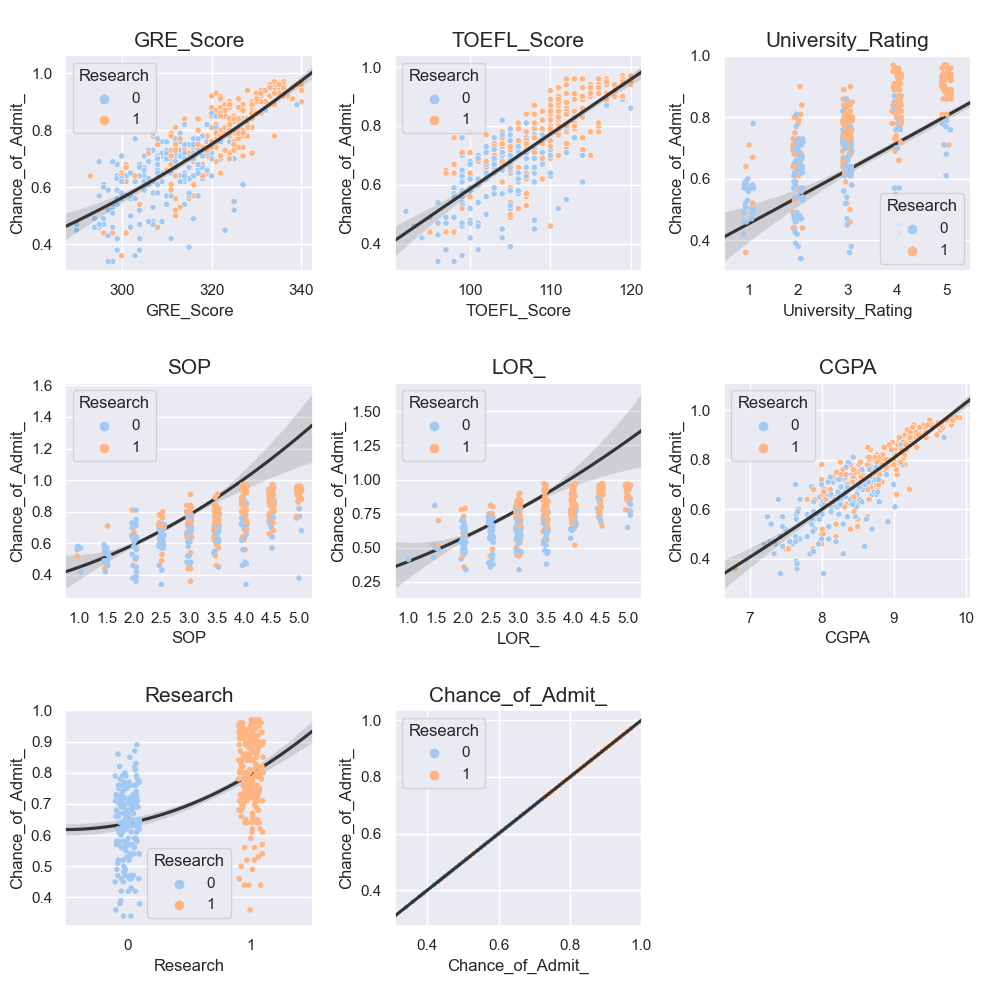

In [129]:
plt.figure(figsize = (10, 10))
plotnumber = 1

# Choose hue data to verify pattern if any
# hue_data = model_data_2['University_Rating']
# hue_data = model_data_2['SOP']
# hue_data = model_data_2['LOR_']
hue_data = model_data_2['Research']

for eachCol in model_data_2:
    x = model_data_2[eachCol]
    ax = plt.subplot(3, 3, plotnumber)

    if model_data_2[eachCol].name in ['University_Rating', 'SOP', 'LOR_', 'Research']:
        sns.stripplot(x = x, y = y, hue = hue_data, s = 4)
    else:
        sns.scatterplot(x = x, y = y, hue = hue_data, s = scatterpoint_fontsize);
        
    # add regression Line
    sns.regplot(data=model_data_2, x=x, y=y,scatter=False, truncate=False, order=2, color=".2",)
    plt.title(f"\n{model_data_2[eachCol].name}", fontsize = subplot_fontsize)
    plotnumber += 1
plt.tight_layout()
plt.show()

![separator1](https://i.imgur.com/ZUWYTii.png)

# Data Modelling

**Full Model**

&emsp;For the initial run, include all independent variables in the model.
<br>&emsp;For every iteration, check if the variables are significant.
<br>&emsp;Manually remove one insignificant variable each iteration until all remaining variables are significant.

&emsp;Level of significance used: 0.05

In [130]:
# Full Model
# Run to show the model results using all variables. Otherwise, proceed to Final Model step.
y_var = 'Chance_of_Admit_'
x_vars = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR_', 'CGPA', 'Research']

# Reduced Model
# Run to show the model results using specific variables. Otherwise, proceed to Final Model step.
y_var = 'Chance_of_Admit_'
x_vars = ['GRE_Score','TOEFL_Score','LOR_','CGPA', 'Research']

**Reduced Model**

&emsp;Variables removed in each iteration (in order):
<br>&emsp;&emsp;&emsp;SOP, University Rating, Research

<br>&emsp;After several iterations, the final predictors are:
<br>&emsp;&emsp;&emsp;GRE Score, TOEFL Score, LOR, CGPA

In [20]:
# Final Model
y_var = 'Chance_of_Admit_'
x_vars = ['GRE_Score','TOEFL_Score','LOR_','CGPA']

In [21]:
# Get the values of y (dependent variable)
y_values = model_data[y_var]
y_values

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance_of_Admit_, Length: 400, dtype: float64

In [23]:
# Get the values of x (independent variables)
x_values = model_data[x_vars]
x_values

,GRE_Score,TOEFL_Score,LOR_,CGPA
0,337,118,4.5,9.65
1,324,107,4.5,8.87
2,316,104,3.5,8.00
3,322,110,2.5,8.67
4,314,103,3.0,8.21
...,...,...,...,...
395,324,110,3.5,9.04
396,325,107,3.5,9.11
397,330,116,4.5,9.45
398,312,103,4.0,8.78


In [33]:
# Add constant to independent/predictor variables because statsmodels does not the constant by default.
x_values = sm.add_constant(x_values)
x_values

,const,GRE_Score,TOEFL_Score,LOR_,CGPA
0,1.0,337,118,4.5,9.65
1,1.0,324,107,4.5,8.87
2,1.0,316,104,3.5,8.00
3,1.0,322,110,2.5,8.67
4,1.0,314,103,3.0,8.21
...,...,...,...,...,...
395,1.0,324,110,3.5,9.04
396,1.0,325,107,3.5,9.11
397,1.0,330,116,4.5,9.45
398,1.0,312,103,4.0,8.78


### Split to TRAIN and TEST Datasets

In [34]:
# Split the data into training (70%) and testing (30%) datasets
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.3,random_state=1234)

### Fit Multiple Linear Regression Model

In [50]:
# Fit the regression line
model = sm.OLS(y_train, x_train).fit()

# Predict the values of y in both the training and testing datasets
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Get the values of variable coefficient
var_coeff = model.params.loc[x_vars]
print(var_coeff)

model_summary = model.summary()
model_summary


GRE_Score      0.002115
TOEFL_Score    0.003442
LOR_           0.023615
CGPA           0.124803
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     286.9
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           8.18e-97
Time:                        23:05:54   Log-Likelihood:                 380.72
No. Observations:                 280   AIC:                            -751.4
Df Residuals:                     275   BIC:                            -733.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.4693      0.126    -11.653      0.000      -1.718      -1.221
GRE_Score       0.0021      0.001      3.140      0.002       0.001       0.003
TOEFL_Score     0.0034      0.001      2.840      0.005       0.001       0.006
LOR_            0.0236      0.006      4.123      0.000       0.012       0.035
CGPA            0.1248      0.014      9.228      0.000       0.098       0.151
==============================================================================
Omnibus:                       60.232   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.188
Skew:                          -1.098   Prob(JB):                     7.97e-27
Kurtosis:                       5.341   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

![separator1](https://i.imgur.com/ZUWYTii.png)

# Evaluate Model
<!-- Get model summary as dataframe -->
 <!-- https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe -->


In [51]:
# Check how many tables
len(model_summary.tables)

3

In [52]:
# First Table
results_as_html = model_summary.tables[0].as_html()
ols_result_1 = pd.read_html(results_as_html, header=None, index_col=None)[0]
ols_result_1

,0,1,2,3
0,Dep. Variable:,Chance_of_Admit_,R-squared:,8.070000e-01
1,Model:,OLS,Adj. R-squared:,8.040000e-01
2,Method:,Least Squares,F-statistic:,2.869000e+02
3,Date:,"Fri, 17 Feb 2023",Prob (F-statistic):,8.180000e-97
4,Time:,23:05:54,Log-Likelihood:,3.807200e+02
5,No. Observations:,280,AIC:,-7.514000e+02
6,Df Residuals:,275,BIC:,-7.333000e+02
7,Df Model:,4,NaN,NaN
8,Covariance Type:,nonrobust,NaN,NaN


**Interpretation:**

&emsp;R-squared:	0.807
<br>&emsp;&emsp;The model can explain 80.7% of the variation in the values of Chance of Admit.

<br>&emsp;Prob (F-statistic): 8.18e-97 -> significant


In [53]:
# Second table 
results_as_html = model_summary.tables[1].as_html()
ols_result_2 = pd.read_html(results_as_html, header=0, index_col=None)[0]
ols_result_2

,Unnamed: 0,coef,std err,t,P>|t|,[0.025,0.975]
0,const,-1.4693,0.126,-11.653,0.000,-1.718,-1.221
1,GRE_Score,0.0021,0.001,3.140,0.002,0.001,0.003
2,TOEFL_Score,0.0034,0.001,2.840,0.005,0.001,0.006
3,LOR_,0.0236,0.006,4.123,0.000,0.012,0.035
4,CGPA,0.1248,0.014,9.228,0.000,0.098,0.151


**Interpretation:**

&emsp;p-values
<br>&emsp;&emsp;const = 0.000 
<br>&emsp;&emsp;GRE_Score = 0.002
<br>&emsp;&emsp;TOEFL_Score = 0.005
<br>&emsp;&emsp;LOR_ = 0.000
<br>&emsp;&emsp;CGPA = 0.000

&emsp;All p-values are below 0.05. There is a significant relationship between the predictors and the dependent variable.
<br><br>

**Final Model:**

&emsp;Chance of Admit = -1.4693 + ( 0.002115 * GRE_Score ) + ( 0.003442 * TOEFL_Score ) + ( 0.023615 * LOR_) + ( 0.124803 * CGPA)

In [65]:
# Table 3 
results_as_html = model_summary.tables[2].as_html()
ols_result_3 = pd.read_html(results_as_html, header=None, index_col=None)[0]
ols_result_3

,0,1,2,3
0,Omnibus:,60.232,Durbin-Watson:,2.036000e+00
1,Prob(Omnibus):,0.000,Jarque-Bera (JB):,1.201880e+02
2,Skew:,-1.098,Prob(JB):,7.970000e-27
3,Kurtosis:,5.341,Cond. No.,1.130000e+04


### Test for Multicollinearity

**Multicollinearity** occurs when the independent variables are highly correlated to each other.

**Variance Inflation Factor (VIF)**
<br>&emsp;VIF starts at 1 and has no upper limit
<br>&emsp;VIF = 1, no correlation between the independent variable and the other variables
<br>&emsp;VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others



In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF Factors. For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_values.values, i) for i in range(x_values.shape[1])]
vif["Predictors"] = x_values.columns

# Inspect VIF Factors. VIF should be <10
vif.round(1)

,VIF Factor,Predictors
0,1077.3,const
1,4.2,GRE_Score
2,4.1,TOEFL_Score
3,1.8,LOR_
4,4.8,CGPA


**Interpretation:**

&emsp;All predictors (x's) have VIF < 10. No multicollinearity issues.

### Test for Homoskedasticity

**Homoskedasticity** happens when the variance of the residuals / error terms are constant i.e., the variance of the data points is almost the same for all data points.

**White's Test**
<br>&emsp;Null Hypothesis (H0): Homoskedasticity is present (residuals are equally scattered)
<br>&emsp;Alternative Hypothesis (HA): Heteroskedasticity is present (residuals are not equally scattered)

In [67]:
# Perform White's test. p-value should be >= 0.05
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model.resid,  model.model.exog)

# Print results of White's test
print(f'Test Statistic: {white_test[0]}')
print(f'Test Statistic (p-value): {white_test[1]}')
# print(f'F-Statistic: {white_test[2]}')
# print(f'F-Test (p-value): {white_test[3]}')

Test Statistic: 21.571992734494398
Test Statistic (p-value): 0.08784708876377695


**Interpretation:**

&emsp;The p-value (0.0878) is not less than 0.05. There is no sufficient evidence to say that heteroskedasticity exists in the model.

### Assumption of Independent Errors

&emsp;Using Durbin-Watson test, the ideal value is 2 or close to 2.

In [68]:
# Perform Durbin-Watson test
# print(model.resid)
sm.stats.stattools.durbin_watson(model.resid)     

2.036016702634327

**Interpretation:**

&emsp;Value (2.0360) is close to 2. The residual error terms are independent of each other.

### Error Evaluation Metrics [TRAIN Dataset]

In [69]:
# Perform Root Mean Square Error (RMSE), Mean Absolute Percent Error (MAPE), Mean Absolute Error (MAE)
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print(f'RMSE (Train): {round(rmse_train,2)}')
print(f'MAPE (Train): {round(mape_train*100,2)}%')


RMSE (Train): 0.06
MAPE (Train): 7.18%


### Error Evaluation Metrics [TEST Dataset]

In [70]:
# Perform Root Mean Square Error (RMSE), Mean Absolute Percent Error (MAPE), Mean Absolute Error (MAE)
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'RMSE (Test): {round(rmse_test,2)}')
print(f'MAPE (Test): {round(mape_test*100,2)}%')

RMSE (Test): 0.07
MAPE (Test): 7.83%


**Interpretation:**

&emsp;Mean Absolute Percentage Errors are low (<10%).

### Visualization: Predicted Y vs Actual Y

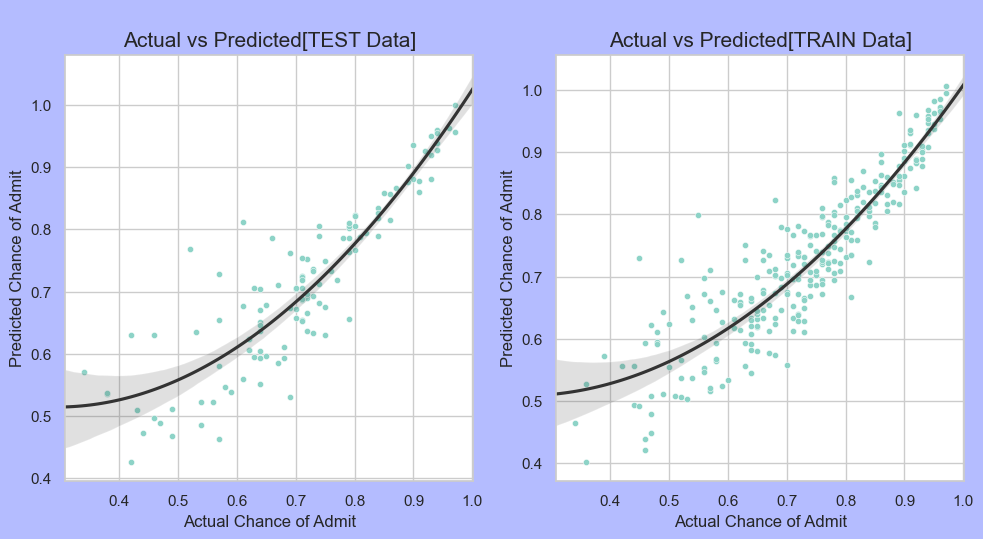

In [71]:
sns.set_theme(style='whitegrid', palette='Set3', ) 
plt.rcParams['figure.facecolor'] = 'B4BCFF' #https://www.colorhexa.com/ffe5b4

plt.figure(figsize = (10, 10))

ax = plt.subplot(2, 2, 1)
sns.scatterplot(x = y_test, y = y_pred_test, s = scatterpoint_fontsize);
sns.regplot(x= y_test, y= y_pred_test,scatter=False, truncate=False, order=2, color=".2",)
plt.title(f"\nActual vs Predicted[TEST Data]", fontsize = subplot_fontsize)
plt.ylabel("Predicted Chance of Admit")
plt.xlabel("Actual Chance of Admit")

ax = plt.subplot(2, 2, 2)
sns.scatterplot(x = y_train, y = y_pred_train, s = scatterpoint_fontsize);
sns.regplot(x= y_train, y= y_pred_train,scatter=False, truncate=False, order=2, color=".2",)
plt.title(f"\nActual vs Predicted[TRAIN Data]", fontsize = subplot_fontsize)
plt.ylabel("Predicted Chance of Admit")
plt.xlabel("Actual Chance of Admit")
plt.tight_layout()
plt.show()

### Visualization: Predicted Y vs Residual


In [72]:
# Compute the residual: Residual = Observed – Predicted
y_test_residual = y_test - y_pred_test
y_train_residual = y_train - y_pred_train

# Create data frame containing data for test and train actual, predicted and residual result
test_residual_df = pd.DataFrame()
test_residual_df['actual'] = y_test
test_residual_df['predicted'] = y_pred_test
test_residual_df['residual'] = y_test_residual

train_residual_df = pd.DataFrame()
train_residual_df['actual'] = y_train
train_residual_df['predicted'] = y_pred_train
train_residual_df['residual'] = y_train_residual

In [73]:
test_residual_df.head()

,actual,predicted,residual
44,0.91,0.876820,0.033180
110,0.61,0.676754,-0.066754
78,0.44,0.472042,-0.032042
181,0.71,0.654017,0.055983
285,0.93,0.880249,0.049751


In [74]:
train_residual_df.head()

,actual,predicted,residual
217,0.85,0.818779,0.031221
349,0.62,0.614671,0.005329
188,0.93,0.877481,0.052519
267,0.73,0.665469,0.064531
222,0.76,0.796459,-0.036459


#### The Residual Plot

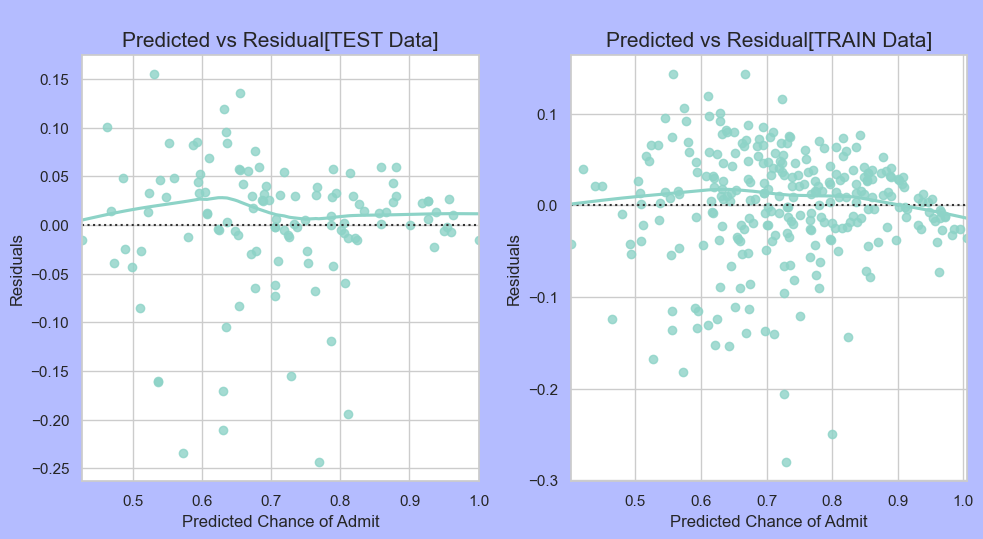

In [75]:
# The prediction made by the model is on the x-axis and the accuracy of the prediction is on the y-axis

plt.figure(figsize = (10, 10))

ax = plt.subplot(2, 2, 1)
sns.residplot(x = y_pred_test, y = y_test_residual, lowess = True);
plt.title(f"\nPredicted vs Residual[TEST Data]", fontsize = subplot_fontsize)
plt.ylabel("Residuals")
plt.xlabel("Predicted Chance of Admit")

ax = plt.subplot(2, 2, 2)
sns.residplot(x = y_pred_train, y = y_train_residual, lowess = True);
plt.title(f"\nPredicted vs Residual[TRAIN Data]", fontsize = subplot_fontsize)
plt.ylabel("Residuals")
plt.xlabel("Predicted Chance of Admit")
plt.tight_layout()
plt.show()

The distance from the line at 0 is how bad the prediction was for that value. 0 means it was exactly predicted.
Based on this visualization, the model looks good satisfying these conditions:
- points are symmetrically distributed
- it tends to cluster towards the middle of the plot
- points clustered around the lower single digits of the y-axis (e.g., 0.5 or 1.5, not 30 or 150).
- there aren’t any clear patterns
- plots do not exhibit heteroscedasticity because we see that the residuals here do not necessarily get larger as the prediction moves from small to large or the other way

<!-- https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/ -->

**Data Source:**
- https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

**References:**

- https://www.statology.org/sklearn-linear-regression-summary/
- https://pythonfordatascienceorg.wordpress.com/linear-regression-python/
- https://www.statology.org/white-test-in-python/
- https://www.statology.org/a-simple-guide-to-understanding-the-f-test-of-overall-significance-in-regression/
- https://seaborn.pydata.org/examples/spreadsheet_heatmap.html
- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
- https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea

**Installations**
- !pip install seaborn
- !pip install plotly
- !pip install lxml 


<!-- # https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22#:~:text=The%20Seaborn%20Pairplot%20allows%20us,to%20become%20familiar%20with%20it.

sns.pairplot(model_data.drop(columns=['Serial_No.', 'outlier_tag']), diag_kind='kde',diag_kws={'color':'red'}, kind='reg',plot_kws={'line_kws':{'color':'black'},'color':'green'},hue='Research',)
plt.show() -->